# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'C:\Users\manas\Downloads\summer (1).csv')

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [5]:
df.nunique()

Year             27
City             22
Sport            43
Discipline       67
Athlete       22762
Country         147
Gender            2
Event           666
Medal             3
dtype: int64

In [7]:
df.count()

Year          31165
City          31165
Sport         31165
Discipline    31165
Athlete       31165
Country       31161
Gender        31165
Event         31165
Medal         31165
dtype: int64

In [6]:
df['City'].value_counts()

London                   3567
Athens                   2149
Los Angeles              2074
Beijing                  2042
Sydney                   2015
Atlanta                  1859
Barcelona                1705
Seoul                    1546
Paris                    1396
Moscow                   1387
Montreal                 1305
Antwerp                  1298
Munich                   1185
Mexico                   1031
Tokyo                    1010
Helsinki                  889
Melbourne / Stockholm     885
Stockholm                 885
Rome                      882
Berlin                    875
Amsterdam                 710
St Louis                  470
Name: City, dtype: int64

# 1. In how many cities Summer Olympics is held so far?

In [10]:
print(len(df['City'].unique()))

22


# 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [53]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False)

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613
14,Football,1497
24,Hockey,1422
8,Wrestling,1212
5,Shooting,1150
19,Sailing,1109


<AxesSubplot:xlabel='Sport'>

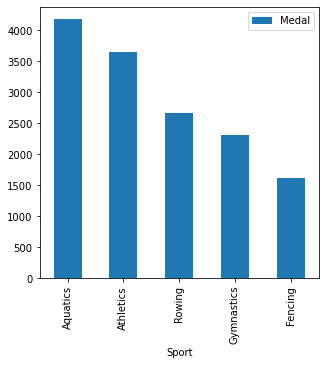

In [54]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (5,5))

# 3. Which sport is having most number of medals so far? (Top 5)

In [19]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head()

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


<AxesSubplot:xlabel='Sport'>

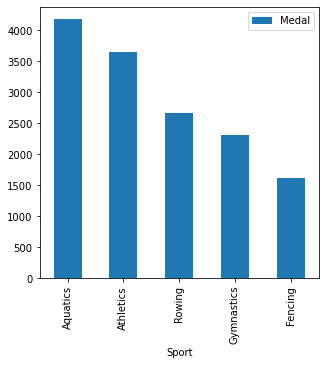

In [20]:
data=[]
for Sport in df["Sport"].unique():
    data.append([Sport , len(df[df["Sport"] == Sport])])
pd.DataFrame(data,columns = ['Sport','Medal']).sort_values(by='Medal', ascending=False).head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (5,5))

# 4. Which player has won most number of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

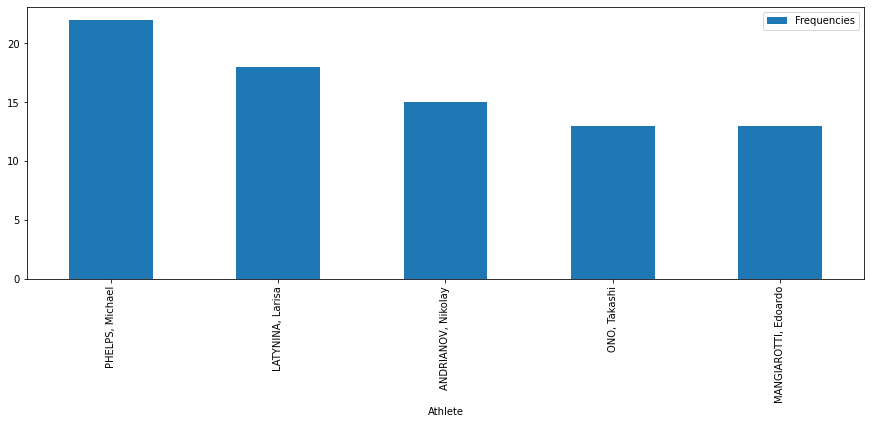

In [52]:
data = []

for Athlete in df['Athlete'].unique():
    data.append([Athlete , len(df[df['Athlete']  == Athlete])])

pd.DataFrame(data,columns = ['Athlete','Frequencies']).sort_values(by='Frequencies', ascending=False).head().plot(x = 'Athlete', y = 'Frequencies', kind = 'bar', figsize = (15,5))

# 5. Which player has won most number Gold Medals of medals? (Top 5)

In [51]:
gold = df[df['Medal']=='Gold'].groupby('Athlete').count()

print(gold)

                           Year  City  Sport  Discipline  Country  Gender  \
Athlete                                                                     
AABYE, Edgar                  1     1      1           1        1       1   
AALTONEN, Paavo Johannes      3     3      3           3        3       3   
AAMODT, Ragnhild              1     1      1           1        1       1   
AAS, Thomas Valentin          1     1      1           1        1       1   
ABALMASAU, Aliaksei           1     1      1           1        1       1   
...                         ...   ...    ...         ...      ...     ...   
ÖRVIG, Thor                   1     1      1           1        1       1   
ÖSTERVOLD, Henrik             1     1      1           1        1       1   
ÖSTERVOLD, Jan Olsen          1     1      1           1        1       1   
ÖSTERVOLD, Kristian Olsen     1     1      1           1        1       1   
ÖSTERVOLD, Ole Olsen          1     1      1           1        1       1   

<AxesSubplot:xlabel='Athlete'>

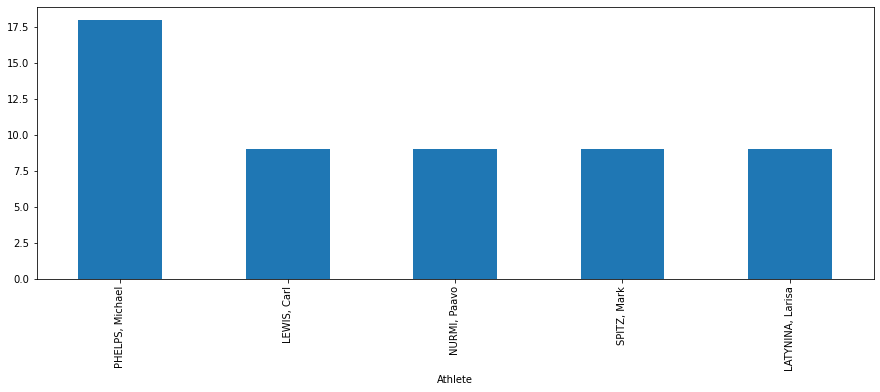

In [41]:
gold = df[df['Medal']=='Gold'].groupby('Athlete').count().sort_values(['Medal'],ascending=False)
gold['Medal'].head().plot(x = 'Athlete', y = 'Medal', kind = 'bar', figsize = (15,5))

# 6. In which year India won first Gold Medal in Summer Olympics?

In [40]:
india = df[df['Country']=='IND']
indiaGold = india[india['Medal']=='Gold'].sort_values(['Year'],ascending=True)
print(indiaGold['Year'].head(1))

5512    1928
Name: Year, dtype: int64


# 7. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

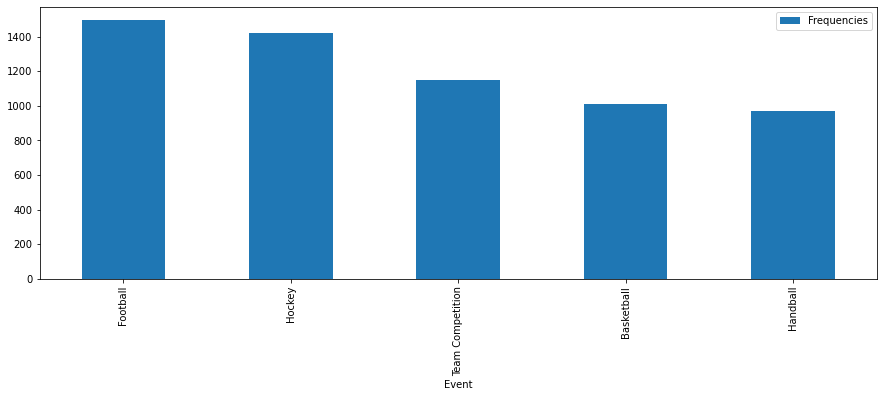

In [35]:
data = []

for Event in df['Event'].unique():
    data.append([Event , len(df[df['Event']  == Event])])

pd.DataFrame(data,columns = ['Event','Frequencies']).sort_values(by='Frequencies', ascending=False).head().plot(x = 'Event', y = 'Frequencies', kind = 'bar', figsize = (15,5))

# 8. Which sport is having most female Gold Medalists? (Top 5)

<AxesSubplot:xlabel='Sport'>

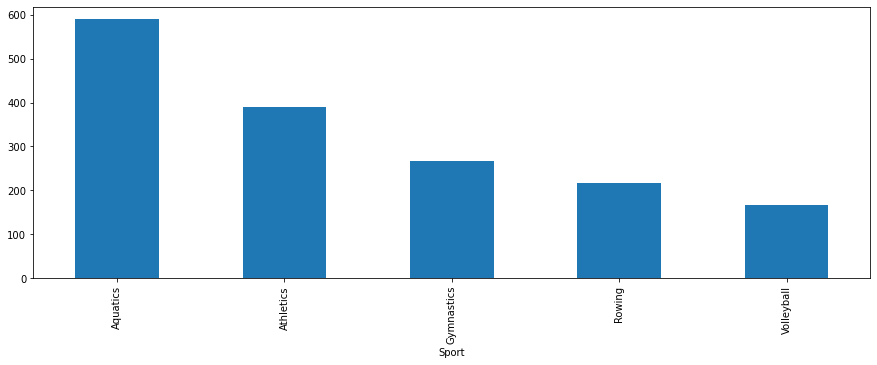

In [23]:
gold = df[df['Medal']=='Gold']
femaleGold = gold[gold['Gender']=='Women'].groupby('Sport').count().sort_values(['Medal'],ascending=False)
femaleGold['Medal'].head().plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (15,5))

In [30]:
gold = df[df['Medal']=='Gold']
femaleGold = gold[gold['Gender']=='Women'].groupby('Sport').count().sort_values(['Medal'],ascending=False)

In [34]:
 print(femaleGold)

                   Year  City  Discipline  Athlete  Country  Gender  Event  \
Sport                                                                        
Aquatics            589   589         589      589      589     589    589   
Athletics           389   389         389      389      388     389    389   
Gymnastics          268   268         268      268      268     268    268   
Rowing              217   217         217      217      217     217    217   
Volleyball          166   166         166      166      166     166    166   
Hockey              144   144         144      144      144     144    144   
Handball            142   142         142      142      142     142    142   
Basketball          120   120         120      120      120     120    120   
Fencing             108   108         108      108      108     108    108   
Football             86    86          86       86       86      86     86   
Canoe / Kayak        76    76          76       76       76     

In [29]:
df['count']=1
df.groupby(['Sport','Gender','Medal']).count()['count']

Sport      Gender  Medal 
Aquatics   Men     Bronze    803
                   Gold      832
                   Silver    809
           Women   Bronze    562
                   Gold      589
                            ... 
Wrestling  Men     Gold      379
                   Silver    381
           Women   Bronze     20
                   Gold       12
                   Silver     12
Name: count, Length: 211, dtype: int64